In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, LabelEncoder
# from sklearn.preprocessing import StandardScaler

In [2]:
file_path = '../dataset/detect_dataset.csv'
df = pd.read_csv(file_path)

In [33]:
df.shape

(12001, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [35]:
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


DATA CLEANING

In [36]:
df.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [37]:
df.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace = True)

In [38]:
df.duplicated().sum()

0

In [44]:
counts = df["Output (S)"].value_counts()
print(counts)

Output (S)
0    6505
1    5496
Name: count, dtype: int64


In [39]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Output (S)',axis=1),df['Output (S)'],random_state=42,test_size=0.2)

In [40]:
model = Sequential([
    Dense(256,'relu',input_dim=x_train.shape[1]),
    Dropout(0.5),
    Dense(128,'relu'),
    Dropout(0.5),
    Dense(1,'sigmoid'),
])
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test,y_test),
                    epochs=100)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4834 - loss: 8.5320 - val_accuracy: 0.4561 - val_loss: 3.0028
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4941 - loss: 5.8277 - val_accuracy: 0.4561 - val_loss: 1.3617
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5030 - loss: 4.6729 - val_accuracy: 0.4561 - val_loss: 1.1125
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5210 - loss: 3.2711 - val_accuracy: 0.4561 - val_loss: 0.7339
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5270 - loss: 2.6558 - val_accuracy: 0.5248 - val_loss: 0.5706
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5280 - loss: 2.0647 - val_accuracy: 0.6252 - val_loss: 0.4851
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5343 - loss: 1.6787 - val_accuracy: 0.5585 - val_loss: 0.4580
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5342 - loss: 1.4570 - val_accu

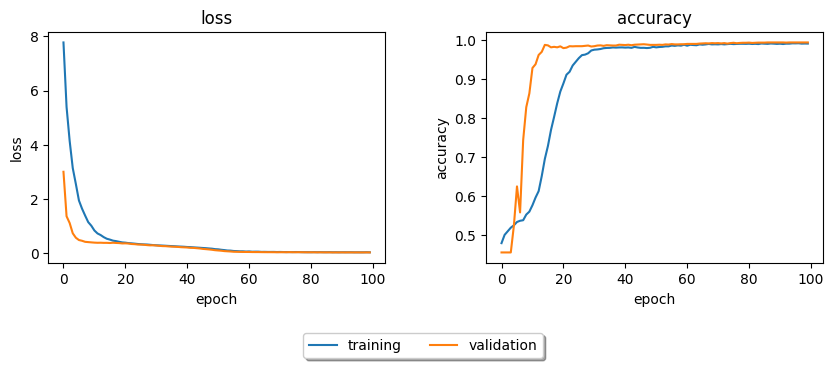

In [41]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.plot(history.history['loss'],label='training')
ax1.plot(history.history['val_loss'],label='validation')
ax1.set_title('loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.subplots_adjust(wspace=0.3)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

In [42]:
# Save the model
model.save('fault_detection_model.h5')

TESTING THE MODEL

In [43]:
import time

test_data = np.array([[-643.6636173,-224.1594274,-132.2828154,0.20953688,-0.095553751,-0.113983129]]) 
time_list = []
for i in range(0, 20):
    start_time = time.time()

    prediction = model.predict(test_data)

    predicted_class = (prediction > 0.5).astype(int)
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time
    time_list.append(elapsed_time)
    
    print("Prediction:", prediction)
    print("Predicted Class:", predicted_class)
    print("Time taken for prediction: {:.4f} seconds".format(elapsed_time))
# Print minimum time taken for prediction
print(f"Minimum time taken for prediction: {min(time_list):.4f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.2714 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1260 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1543 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1616 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1777 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1624 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1115 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: [[1.]]
Predicted Class: [[1]]
Time taken for prediction: 0.1572 seconds
1/1 ━━━━━━━━━━━━━━━━━━━